# Seaborn을 사용한 데이터 분포 시각화

In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline

# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [48]:
iris = sns.load_dataset("iris")         # 붓꽃 데이터
titanic = sns.load_dataset("titanic")   # 타이타닉호 데이터
tips = sns.load_dataset("tips")         # 팁 데이터
flights = sns.load_dataset("flights")   # 여객운송 데이터

### 1차원 분포 플롯

#### 1차원 실수 분포 플롯

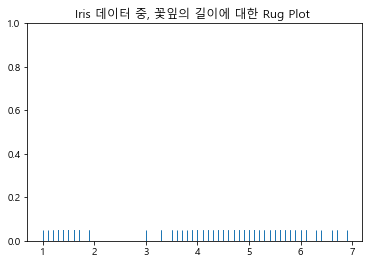

In [49]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

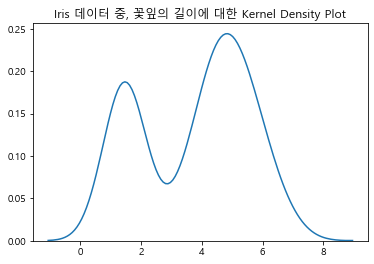

In [50]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

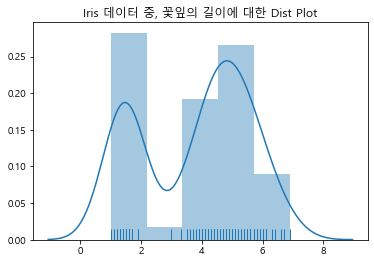

In [51]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

#### 카운트 플롯

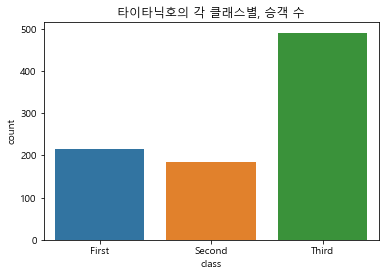

In [52]:
# groupby('class').count() 한 값
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

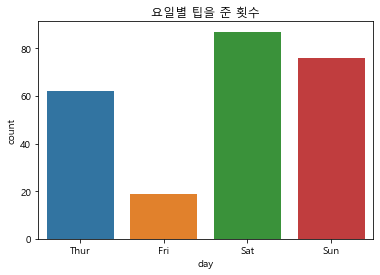

In [53]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

In [54]:
tips.groupby('day').count()['size']

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: size, dtype: int64

### 다차원 데이터

#### 2차원 실수형 데이터

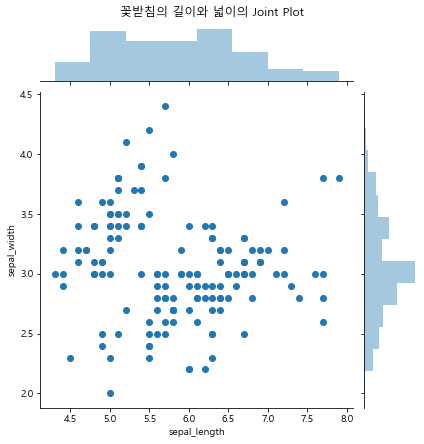

In [55]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

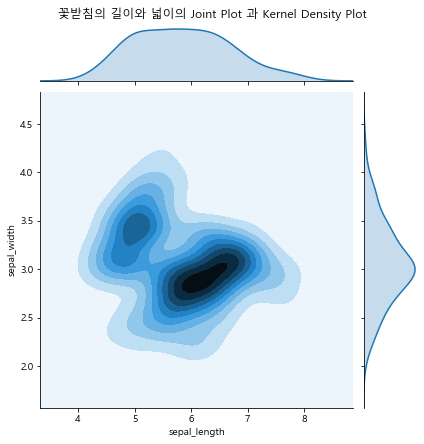

In [56]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

#### 다차원 실수형 데이터

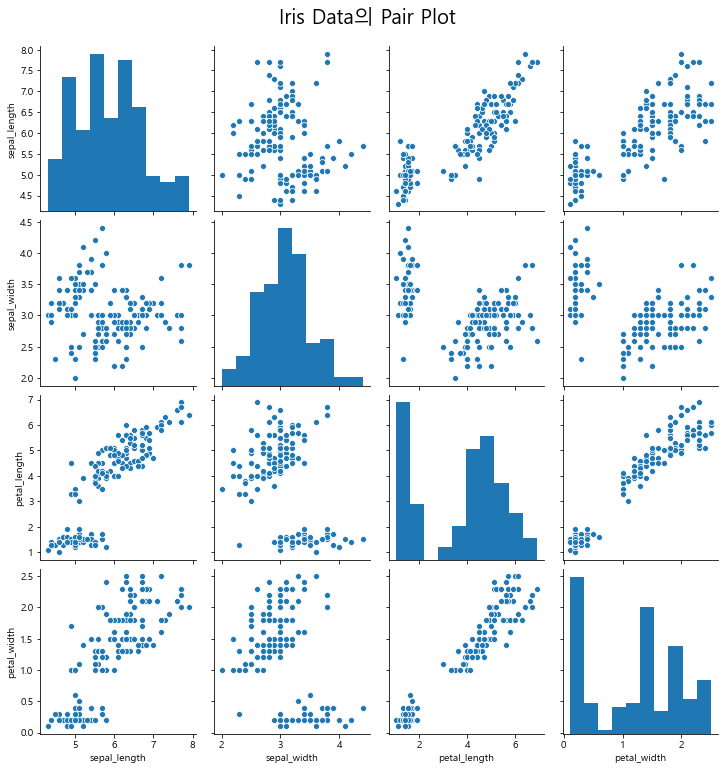

In [57]:
sns.pairplot(iris)
plt.suptitle("Iris Data의 Pair Plot", y=1.05, fontsize=20)
plt.show()

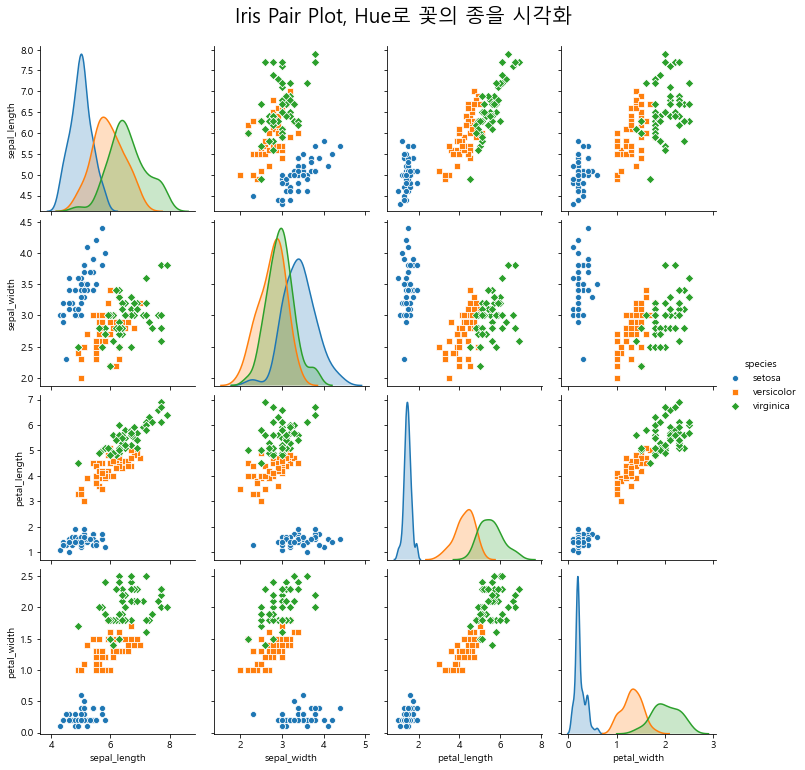

In [58]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.suptitle("Iris Pair Plot, Hue로 꽃의 종을 시각화", y=1.05, fontsize=20)
plt.show()

#### 2차원 카테고리 데이터

In [59]:
titanic_size = titanic.pivot_table(index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


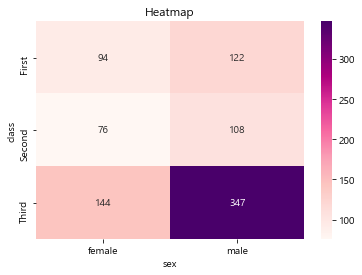

In [60]:
sns.heatmap(titanic_size, cmap='RdPu', annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

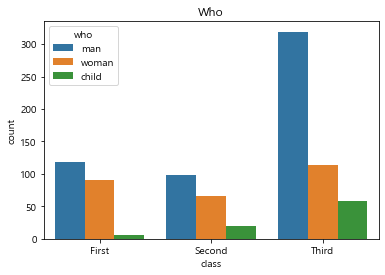

In [67]:
sns.countplot(x='class', hue='who', data=titanic)
plt.title('Who')
plt.show()

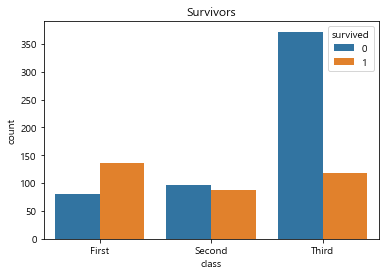

In [62]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Survivors')
plt.show()

#### 2차원 복합 데이터

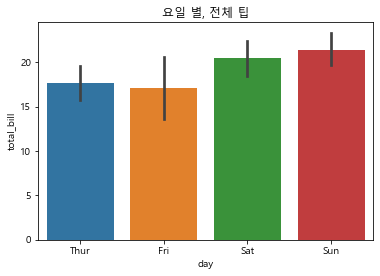

In [63]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

In [64]:
mpg = sns.load_dataset('mpg')
def get_mfger(full_name):
    return full_name.split()[0]
def get_model(full_name):
    return ' '.join(full_name.split()[1:])

mpg['manufacturer'] = mpg.name.apply(get_mfger)
mpg['model'] = mpg.name.apply(get_model)

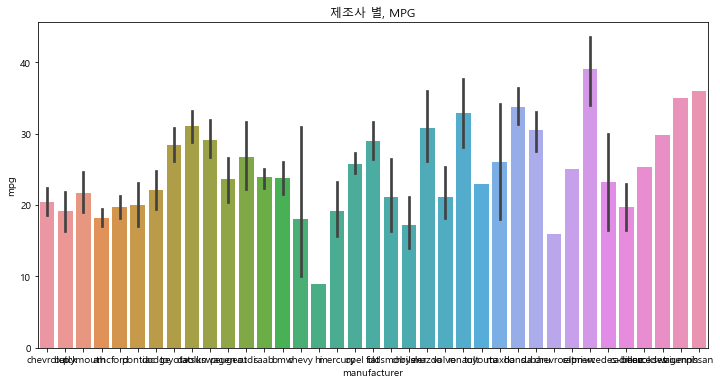

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x="manufacturer", y="mpg", data=mpg)
plt.title("제조사 별, MPG")
plt.show()

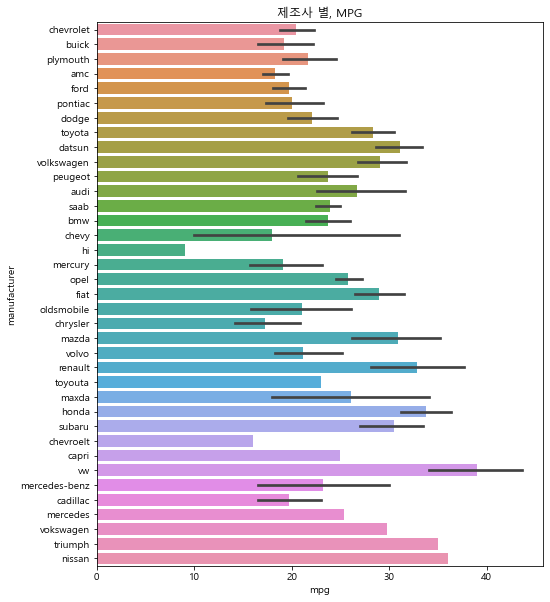

In [66]:
plt.figure(figsize=(8, 10))
sns.barplot(x="mpg", y="manufacturer", data=mpg)
plt.title("제조사 별, MPG")
plt.show()

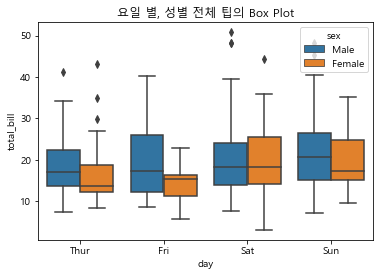

In [68]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

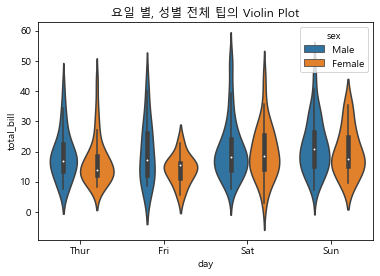

In [69]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

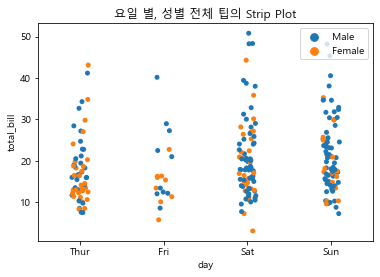

In [70]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

### 다차원 복합 데이터

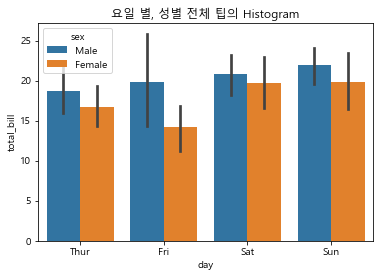

In [71]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

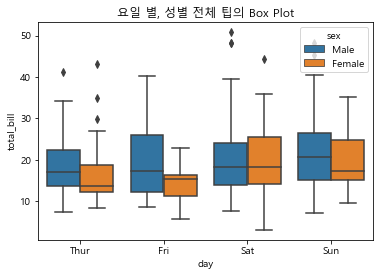

In [76]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

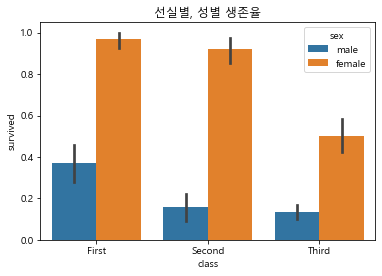

In [75]:
sns.barplot(x="class", y="survived", hue="sex", data=titanic)
plt.title("선실별, 성별 생존율")
plt.show()

In [77]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [79]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


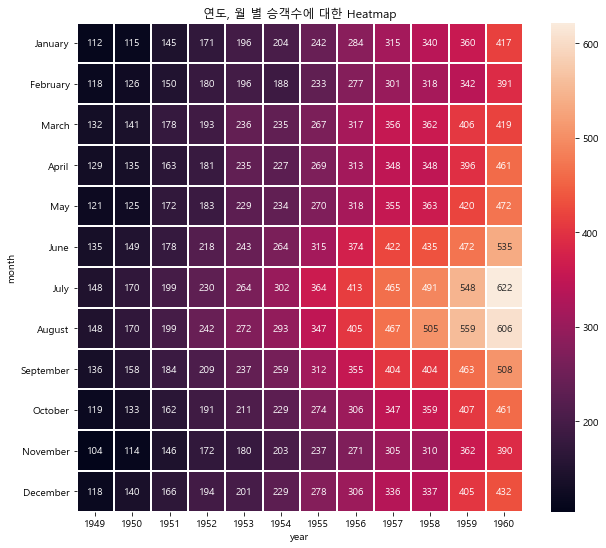

In [81]:
plt.figure(figsize=(10, 9))
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

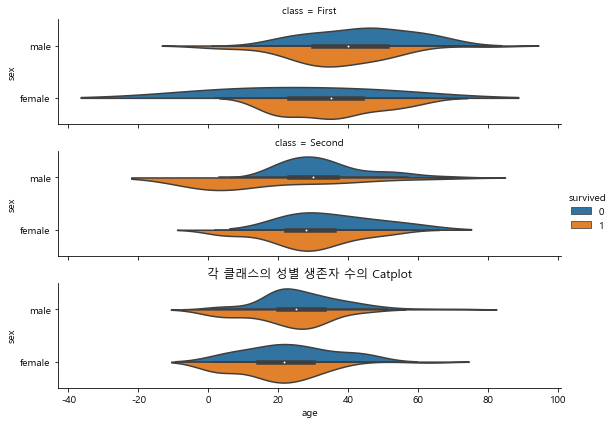

In [84]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

In [85]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

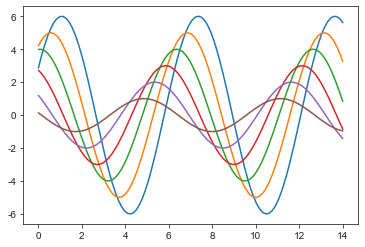

In [86]:
sns.set_style("ticks")
sinplot()

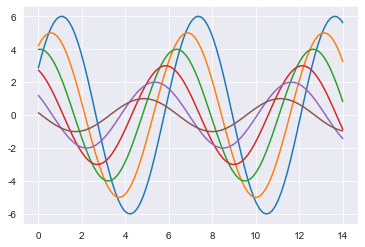

In [87]:
sns.set_style("darkgrid")
sinplot()

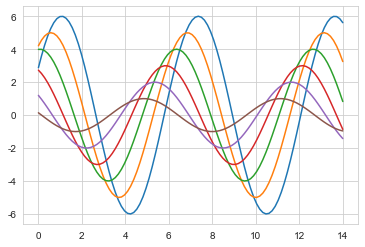

In [88]:
sns.set_style("whitegrid")
sinplot()